<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# Truth Tables #
By Richard Sowers
* <r-sowers@illinois.edu>
* <https://publish.illinois.edu/r-sowers/>

Copyright 2020 University of Illinois Board of Trustees. All Rights Reserved.

### imports and graphics configurations ###

In [ ]:
import os
import numpy
import pandas
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
#from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
import sklearn.linear_model
import sklearn.model_selection
import graphviz
import itertools

import imageio
import PIL

def saver(fname):
    plt.savefig(fname+".png",bbox_inches="tight")

def legend(pos="bottom",ncol=3):
    if pos=="bottom":
        plt.legend(bbox_to_anchor=(0.5,-0.2), loc='upper center',facecolor="lightgray",ncol=ncol)
    elif pos=="side":
        plt.legend(bbox_to_anchor=(1.1,0.5), loc='center left',facecolor="lightgray",ncol=1)

def textbox(txt,fname=None):
    plt.figure(figsize=(1,1))
    plt.gca().add_artist(offsetbox.AnchoredText("\n".join(txt), loc="center",prop=dict(size=30)))
    plt.axis('off')
    if fname is not None:
        saver(fname)
    plt.show()
    plt.close()

In [ ]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5
}
plt.rcParams.update(params)

In [ ]:
pngfiles=[f for f in os.listdir(".") if f.endswith(".png")]
print("existing png files: "+str(pngfiles))
print([os.remove(f) for f in pngfiles])

existing png files: ['clipper.png', 'hyper.png', 'logistic.png', 'logistic_reversed.png', 'logistic_scaled.png', 'Quadrants.png', 'truth3.gv.png', 'truth3reduced.gv.png', 'tt_1.png', 'tt_12.png', 'tt_123.png', 'tt_1234.png', 'tt_124.png', 'tt_13.png', 'tt_134.png', 'tt_14.png', 'tt_2.png', 'tt_23.png', 'tt_234.png', 'tt_24.png', 'tt_3.png', 'tt_34.png', 'tt_4.png', 'tt_null.png']
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


### configuration variables###

In [ ]:
SEED=0
markersize=5
thinlinewidth=2
textboxsize=(5,0.5)

In [ ]:
x_min=-3
x_max=3
N_points=100

### code starts here###

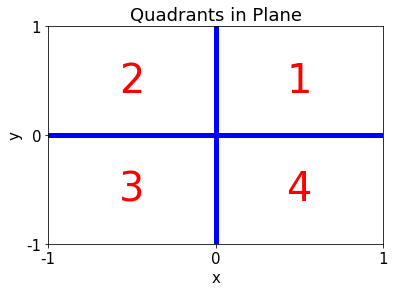

In [ ]:
plt.figure()
plt.axhline(0,color="blue")
plt.axvline(0,color="blue")
plt.text(.5,.5,"1",color="red",fontsize=40,horizontalalignment='center',verticalalignment='center')
plt.text(-.5,.5,"2",color="red",fontsize=40,horizontalalignment='center',verticalalignment='center')
plt.text(-.5,-.5,"3",color="red",fontsize=40,horizontalalignment='center',verticalalignment='center')
plt.text(.5,-.5,"4",color="red",fontsize=40,horizontalalignment='center',verticalalignment='center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("x")
plt.ylabel("y")
plt.xticks([-1,0,1],[-1,0,1])
plt.yticks([-1,0,1],[-1,0,1])
title=[]
title.append("Quadrants in Plane")
plt.title("\n".join(title))
saver("Quadrants")
plt.show()
plt.close()

In [ ]:
def logistic(z,scale=1,loc=0):
    assert (scale>0)
    z=(z-loc)/scale
    return 1/(1+numpy.exp(-z))

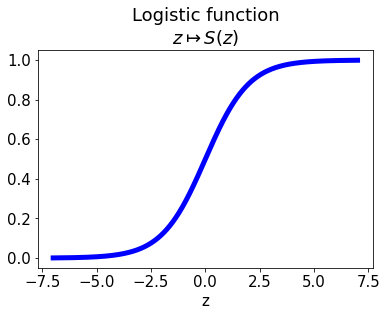

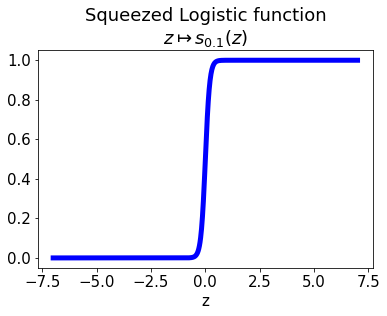

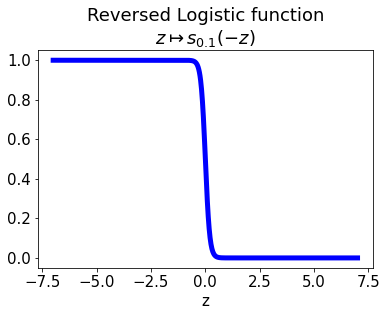

In [ ]:
graph_max=7
temp=numpy.linspace(-graph_max,graph_max,num=1000)
plt.figure()
plt.plot(temp,logistic(temp),color="blue")
title=[]
title.append("Logistic function")
title.append(r"$z\mapsto S(z)$")
plt.title("\n".join(title))
plt.xlabel("z")
saver("logistic")
plt.show()
plt.close()

plt.figure()
plt.plot(temp,logistic(temp,scale=0.1),color="blue")
title=[]
title.append("Squeezed Logistic function")
title.append(r"$z\mapsto s_{0.1}(z)$")
plt.title("\n".join(title))
plt.xlabel("z")
saver("logistic_scaled")
plt.show()
plt.close()

plt.figure()
plt.plot(temp,logistic(-temp,scale=0.1),color="blue")
plt.xlabel("z")
title=[]
title.append("Reversed Logistic function")
title.append(r"$z\mapsto s_{0.1}(-z)$")
plt.title("\n".join(title))
saver("logistic_reversed")
plt.show()
plt.close()

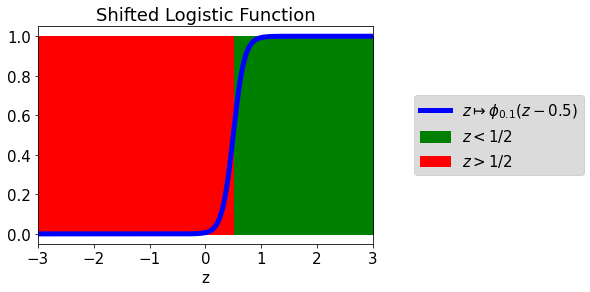

In [ ]:
plt.figure()
plt.plot(temp,logistic(temp-0.5,scale=0.1),color="blue",label=r"$z\mapsto \phi_{0.1}(z-0.5)$")
plt.fill_between([1/2,3],[0,0],[1,1],color="green",label=r"$z<1/2$")
plt.fill_between([-3,1/2],[0,0],[1,1],color="red",label=r"$z>1/2$")
title=[]
title.append("Shifted Logistic Function")
plt.title("\n".join(title))
plt.xlim(-3,3)
plt.xlabel("z")
legend("side")
saver("clipper")
plt.show()
plt.close()

In [ ]:
xy=scipy.stats.norm.rvs(size=(N_points,2),random_state=SEED)
x=xy[:,0].flatten()
y=xy[:,1].flatten()

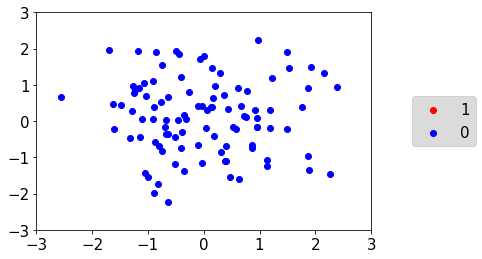

In [ ]:
plt.figure()
flags=numpy.full(N_points,False)
plt.scatter(x[flags],y[flags],color="red",label="1")
plt.scatter(x[~flags],y[~flags],color="blue",label="0")
plt.xlim(x_min,x_max)
plt.ylim(x_min,x_max)
legend("side")
saver("tt_null")
plt.show()
plt.close()

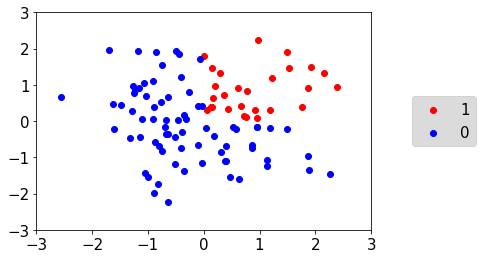

In [ ]:
plt.figure()
flags=(x>0)&(y>0)
plt.scatter(x[flags],y[flags],color="red",label="1")
plt.scatter(x[~flags],y[~flags],color="blue",label="0")
plt.xlim(x_min,x_max)
plt.ylim(x_min,x_max)
legend("side")
saver("tt_1")
plt.show()
plt.close()

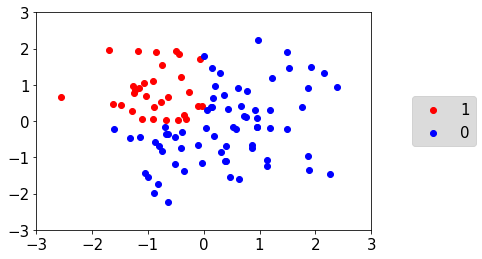

In [ ]:
plt.figure()
flags=(x<=0)&(y>0)
plt.scatter(x[flags],y[flags],color="red",label="1")
plt.scatter(x[~flags],y[~flags],color="blue",label="0")
plt.xlim(x_min,x_max)
plt.ylim(x_min,x_max)
legend("side")
saver("tt_2")
plt.show()
plt.close()

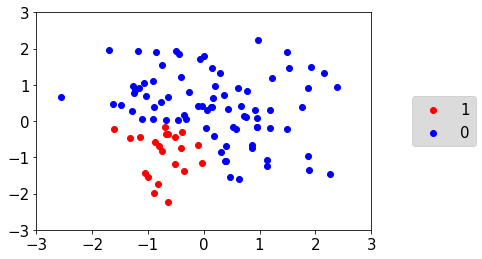

In [ ]:
plt.figure()
flags=(x<=0)&(y<=0)
plt.scatter(x[flags],y[flags],color="red",label="1")
plt.scatter(x[~flags],y[~flags],color="blue",label="0")
plt.xlim(x_min,x_max)
plt.ylim(x_min,x_max)
legend("side")
saver("tt_3")
plt.show()
plt.close()

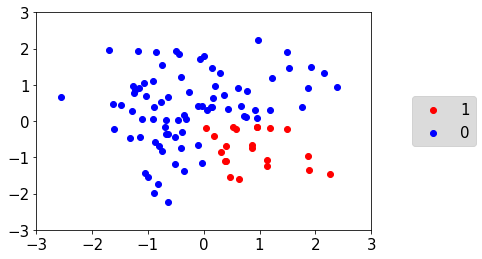

In [ ]:
plt.figure()
flags=(x>0)&(y<=0)
plt.scatter(x[flags],y[flags],color="red",label="1")
plt.scatter(x[~flags],y[~flags],color="blue",label="0")
plt.xlim(x_min,x_max)
plt.ylim(x_min,x_max)
legend("side")
saver("tt_4")
plt.show()
plt.close()

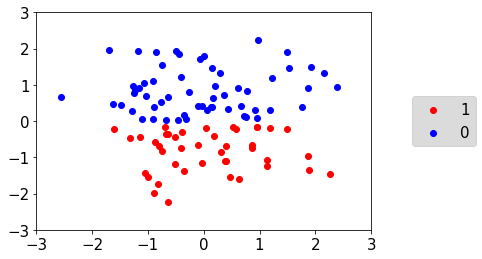

In [ ]:
plt.figure()
flags=(y<0)
plt.scatter(x[flags],y[flags],color="red",label="1")
plt.scatter(x[~flags],y[~flags],color="blue",label="0")
plt.xlim(x_min,x_max)
plt.ylim(x_min,x_max)
legend("side")
saver("tt_12")
plt.show()
plt.close()

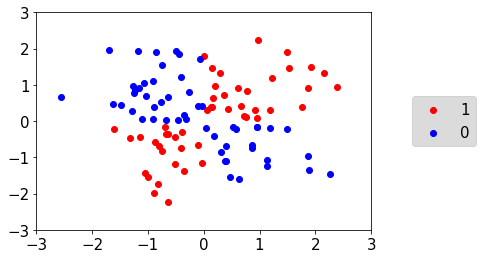

In [ ]:
plt.figure()
flags=((x>0)&(y>0))|((x<=0)&(y<=0))
plt.scatter(x[flags],y[flags],color="red",label="1")
plt.scatter(x[~flags],y[~flags],color="blue",label="0")
plt.xlim(x_min,x_max)
plt.ylim(x_min,x_max)
legend("side")
saver("tt_13")
plt.show()
plt.close()

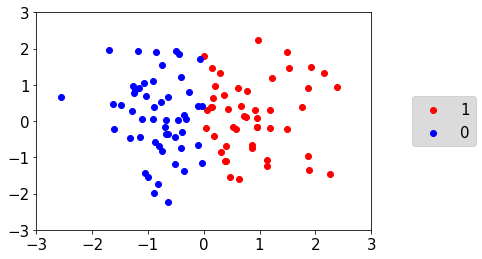

In [ ]:
plt.figure()
flags=(x>0)
plt.scatter(x[flags],y[flags],color="red",label="1")
plt.scatter(x[~flags],y[~flags],color="blue",label="0")
plt.xlim(x_min,x_max)
plt.ylim(x_min,x_max)
legend("side")
saver("tt_14")
plt.show()
plt.close()

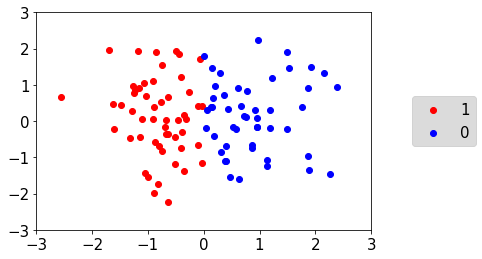

In [ ]:
plt.figure()
flags=(x<=0)
plt.scatter(x[flags],y[flags],color="red",label="1")
plt.scatter(x[~flags],y[~flags],color="blue",label="0")
plt.xlim(x_min,x_max)
plt.ylim(x_min,x_max)
legend("side")
saver("tt_23")
plt.show()
plt.close()

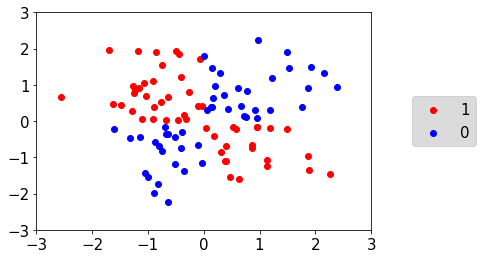

In [ ]:
plt.figure()
flags=((x<=0)&(y>0))|((x>0)&(y<=0))
plt.scatter(x[flags],y[flags],color="red",label="1")
plt.scatter(x[~flags],y[~flags],color="blue",label="0")
plt.xlim(x_min,x_max)
plt.ylim(x_min,x_max)
legend("side")
saver("tt_24")
plt.show()
plt.close()

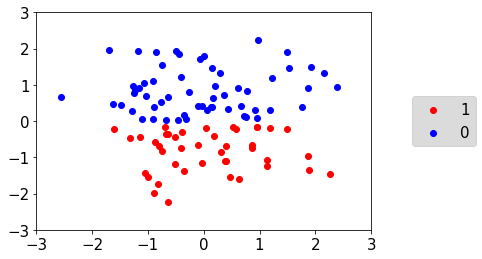

In [ ]:
plt.figure()
flags=(y<=0)
plt.scatter(x[flags],y[flags],color="red",label="1")
plt.scatter(x[~flags],y[~flags],color="blue",label="0")
plt.xlim(x_min,x_max)
plt.ylim(x_min,x_max)
legend("side")
saver("tt_34")
plt.show()
plt.close()

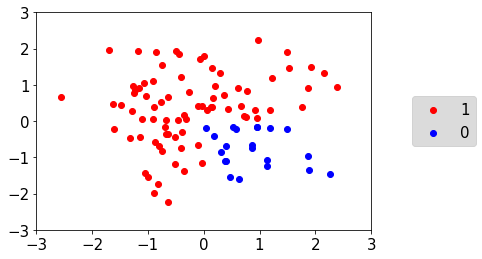

In [ ]:
plt.figure()
flags=(x<=0)|(y>0)
plt.scatter(x[flags],y[flags],color="red",label="1")
plt.scatter(x[~flags],y[~flags],color="blue",label="0")
plt.xlim(x_min,x_max)
plt.ylim(x_min,x_max)
legend("side")
saver("tt_123")
plt.show()
plt.close()

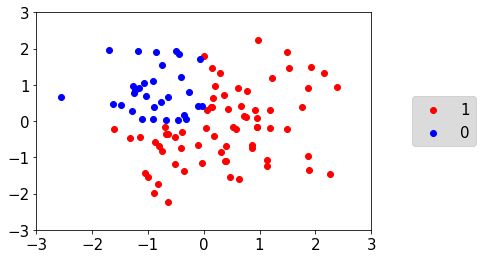

In [ ]:
plt.figure()
flags=(x>0)|(y<=0)
plt.scatter(x[flags],y[flags],color="red",label="1")
plt.scatter(x[~flags],y[~flags],color="blue",label="0")
plt.xlim(x_min,x_max)
plt.ylim(x_min,x_max)
legend("side")
saver("tt_124")
plt.show()
plt.close()

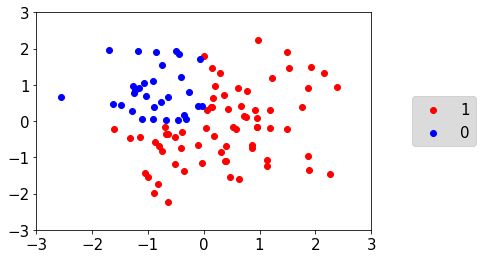

In [ ]:
plt.figure()
flags=(x>0)|(y<=0)
plt.scatter(x[flags],y[flags],color="red",label="1")
plt.scatter(x[~flags],y[~flags],color="blue",label="0")
plt.xlim(x_min,x_max)
plt.ylim(x_min,x_max)
legend("side")
saver("tt_134")
plt.show()
plt.close()

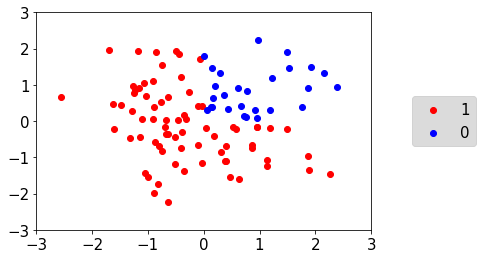

In [ ]:
plt.figure()
flags=(x<=0)|(y<=0)
plt.scatter(x[flags],y[flags],color="red",label="1")
plt.scatter(x[~flags],y[~flags],color="blue",label="0")
plt.xlim(x_min,x_max)
plt.ylim(x_min,x_max)
legend("side")
saver("tt_234")
plt.show()
plt.close()

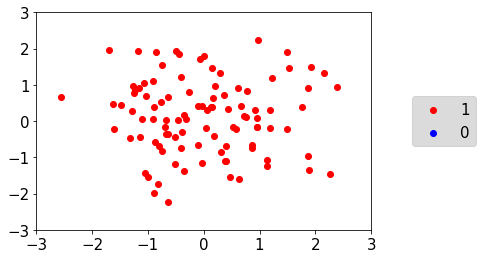

In [ ]:
plt.figure()
flags=numpy.full(N_points,True)
plt.scatter(x[flags],y[flags],color="red",label="1")
plt.scatter(x[~flags],y[~flags],color="blue",label="0")
plt.xlim(x_min,x_max)
plt.ylim(x_min,x_max)
legend("side")
saver("tt_1234")
plt.show()
plt.close()

In [ ]:
def process(s):
    out=s.replace("a","<a<sub>")
    return out+"</sub>>"

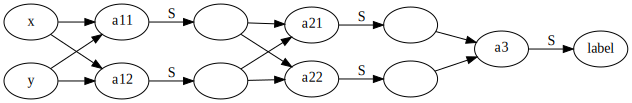

In [ ]:
features=["x","y"]
labels=["label"]
a1=["a11","a12"]
a1_=["a11_","a12_"]
a2=["a21","a22"]
a2_=["a21_","a22_"]
a3=["a3"]
g = graphviz.Digraph(name="truth3",format="png")
g.attr(rankdir='LR')
[g.node(feature) for feature in features]
[g.edge(a,b) for a,b in itertools.product(features,a1)]
[g.node(a,label=process(a)) for a in a1]
[g.edge(a,b,label="S") for a,b in zip(a1,a1_)]
[g.node(a,label="") for a in a1_]
[g.edge(a,b) for a,b in itertools.product(a1_,a2)]
[g.node(a,process(a)) for a in a2]
[g.edge(a,b,label="S") for a,b in zip(a2,a2_)]
[g.node(a,label="") for a in a2_]
[g.edge(a,b) for a,b in itertools.product(a2_,a3)]
[g.node(a,label=process(a)) for a in a3]
[g.edge(a,b,label="S") for a,b in zip(a3,labels)]
[g.node(a) for a in labels]
g

In [ ]:
g.render()

'truth3.gv.png'

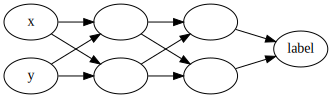

In [ ]:
features=["x","y"]
labels=["label"]
a1_=["a11_","a12_"]
a2_=["a21_","a22_"]
a3=["a3"]
g = graphviz.Digraph(name="truth3reduced",format="png")
g.attr(rankdir='LR')
[g.node(feature) for feature in features]
[g.edge(a,b) for a,b in itertools.product(features,a1_)]
[g.node(a,label="") for a in a1_]
[g.edge(a,b) for a,b in itertools.product(a1_,a2_)]
[g.node(a,label="") for a in a2_]
[g.edge(a,b) for a,b in itertools.product(a2_,labels)]
[g.node(a) for a in labels]
g

In [ ]:
g.render()

'truth3reduced.gv.png'

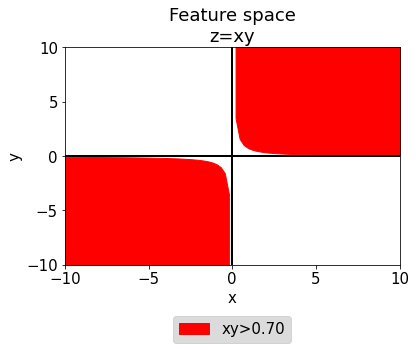

In [ ]:
h_min=0.2
h_max=5/h_min
h_range=numpy.linspace(h_min,h_max,num=103)
product=0.7
plt.fill_between(h_range,product/h_range,h_max,color="red",label="xy>{0:.2f}".format(product))
plt.fill_between(-h_range,-h_max,-product/h_range,color="red")
plt.axhline(0,color="black",linewidth=2)
plt.axvline(0,color="black",linewidth=2)
title=[]
title.append("Feature space")
title.append("z=xy")
plt.title("\n".join(title))
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.xlabel("x")
plt.ylabel("y")
legend("bottom")
saver("hyper")
plt.show()
plt.close()